In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("C:/Users/Dickson/Downloads/Data Science tutorials/pima-indians-diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThicknes,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcom
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.shape

(768, 9)

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThicknes                0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcom                      0
dtype: int64

In [32]:
df.Outcom.value_counts()

0    500
1    268
Name: Outcom, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThicknes              768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcom                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

In [34]:
corr_matrix = df.corr()
corr_matrix['Outcom'].sort_values(ascending=False)

Outcom                      1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThicknes                0.074752
BloodPressure               0.065068
Name: Outcom, dtype: float64

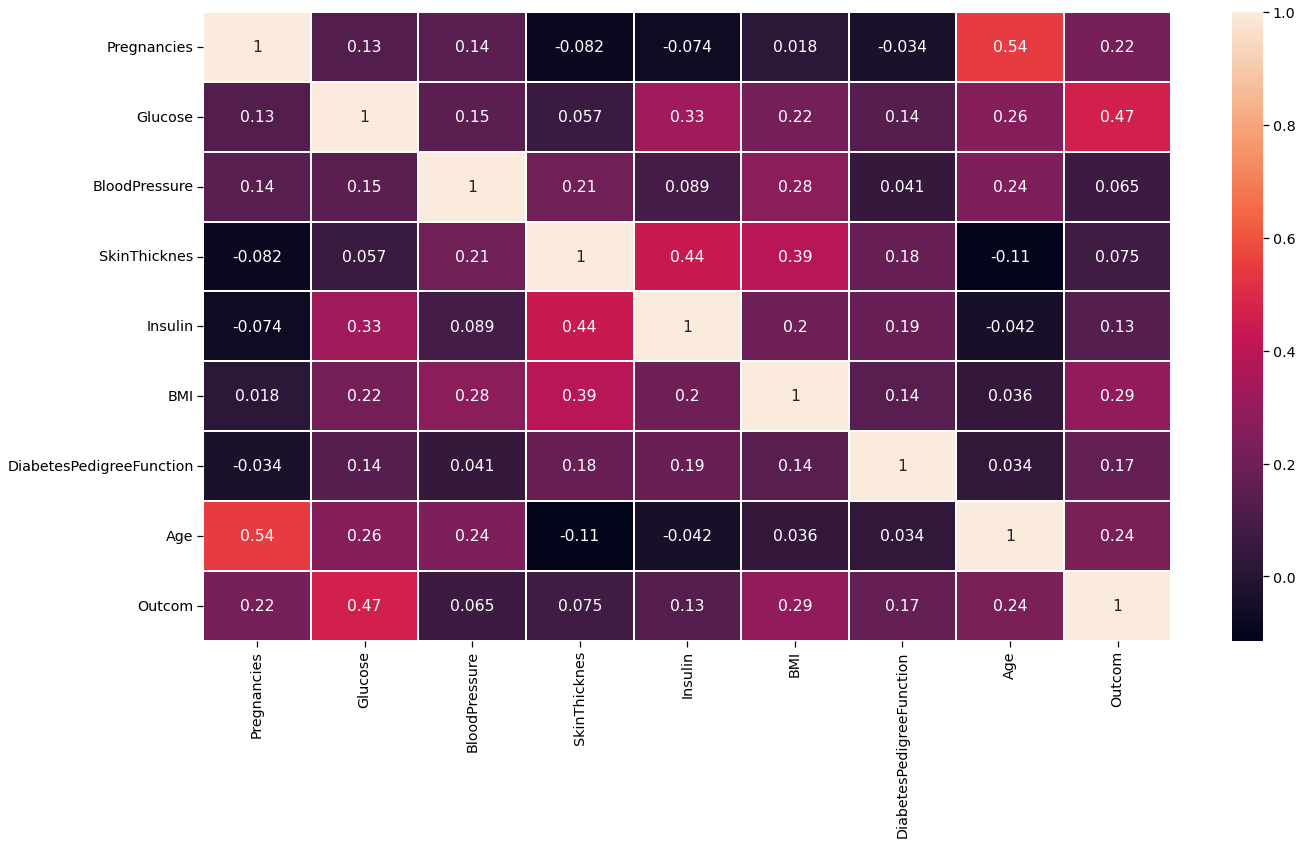

In [35]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

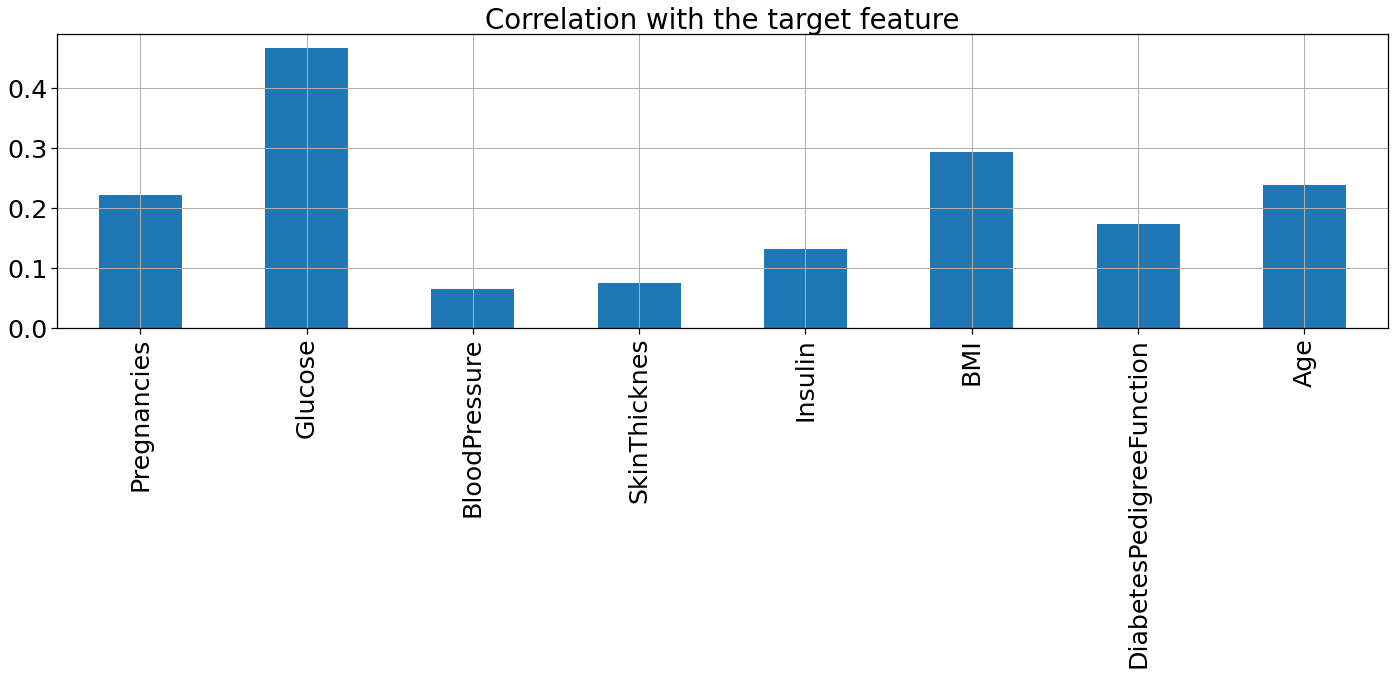

In [36]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('Outcom', axis=1).corrwith(df.Outcom).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

# Age(“age”) Analysis
Here we will be checking the 10 ages and their counts.

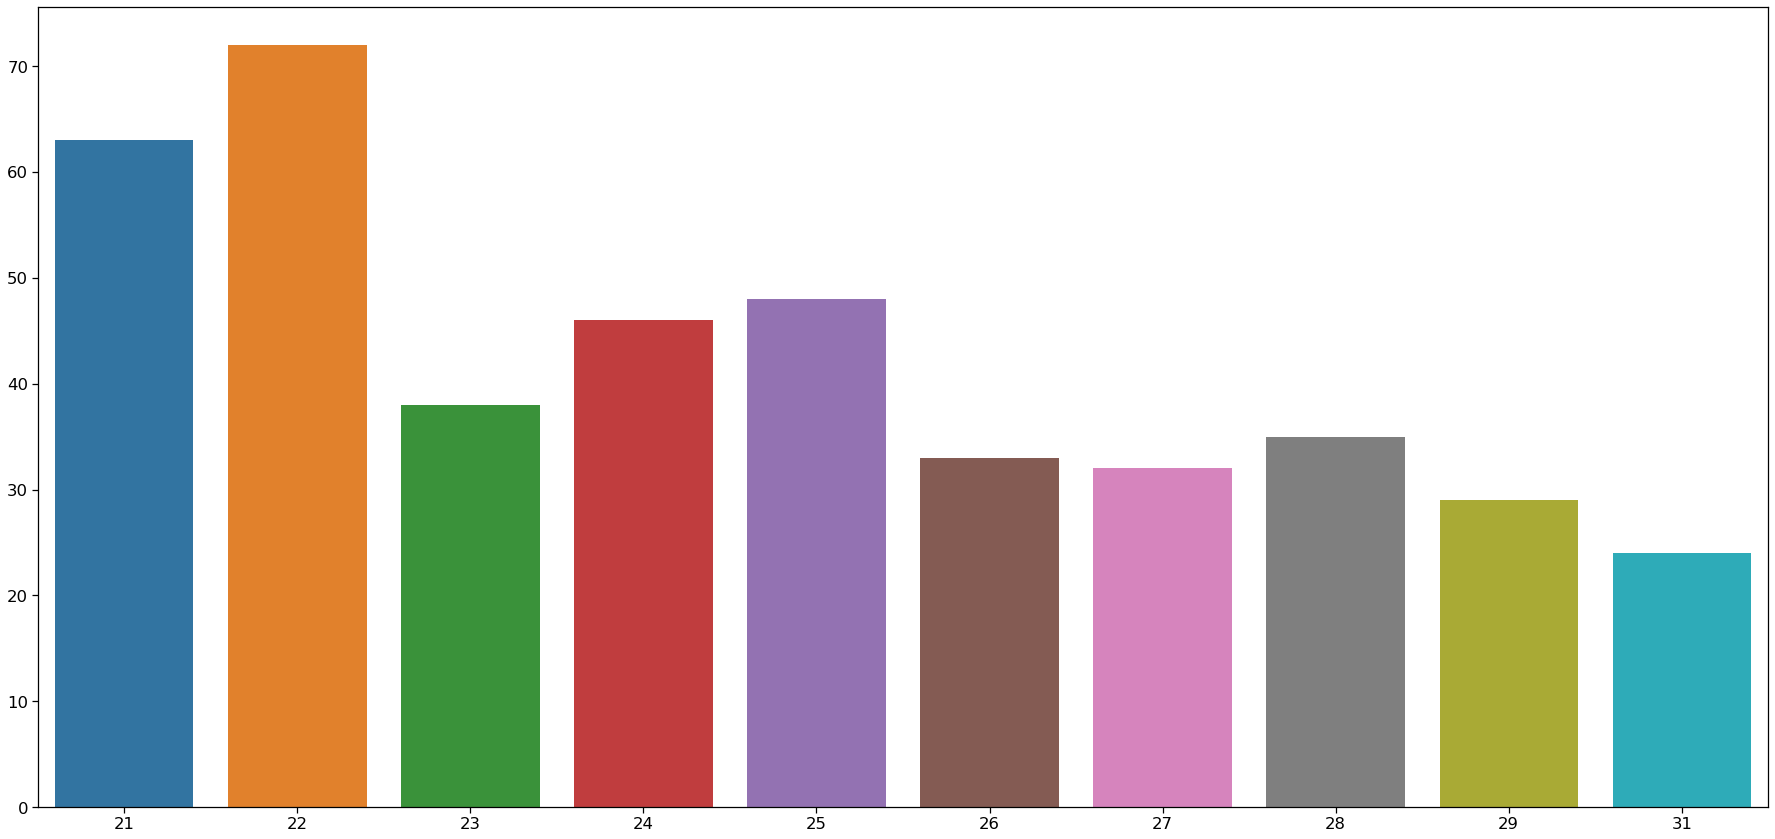

In [37]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.Age.value_counts()[:10].index,y=df.Age.value_counts()[:10].values)
plt.tight_layout()

Inference: Here we can see that the 22 age column has the highest frequency.

Let’s check the range of age in the dataset.

In [38]:
minAge=min(df.Age)
maxAge=max(df.Age)
meanAge=df.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 21
Max Age : 81
Mean Age : 33.240885416666664


We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

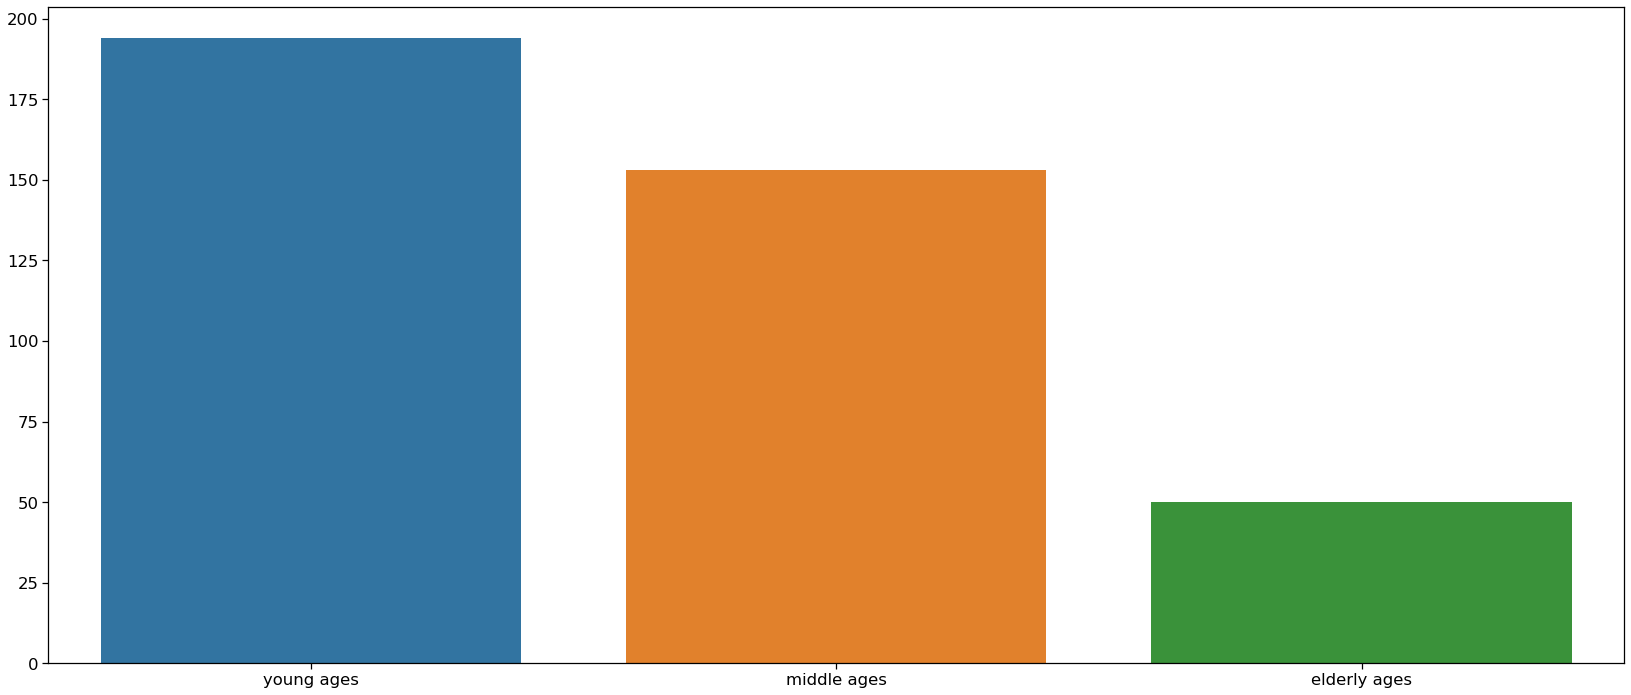

In [39]:
Young = df[(df.Age>=29)&(df.Age<40)]
Middle = df[(df.Age>=40)&(df.Age<55)]
Elder = df[(df.Age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Inference: Here we can see that young people are the most affected by heart disease and young ones are the least affected.

To prove the above inference we will plot the pie chart.

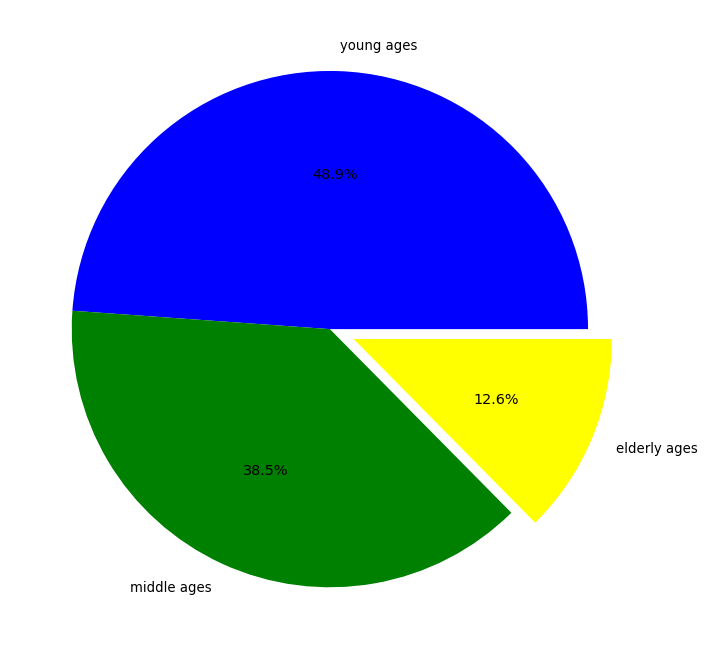

In [40]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

# Pregnancies Analysis

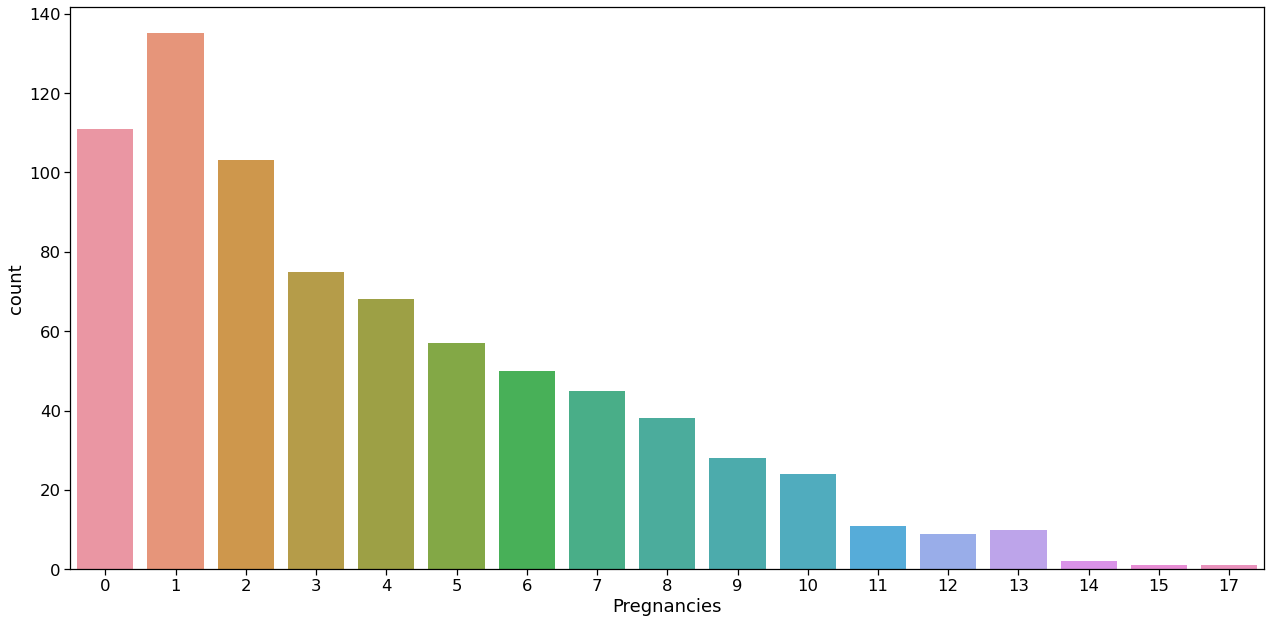

In [41]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['Pregnancies'])
plt.tight_layout()

Inference: As seen, people who had one pregnancy were majority

0. Never given birth
1. one pregnancy
2. two pregnancies
3. three pregnancies

Analyzing pregnancy vs outcome column

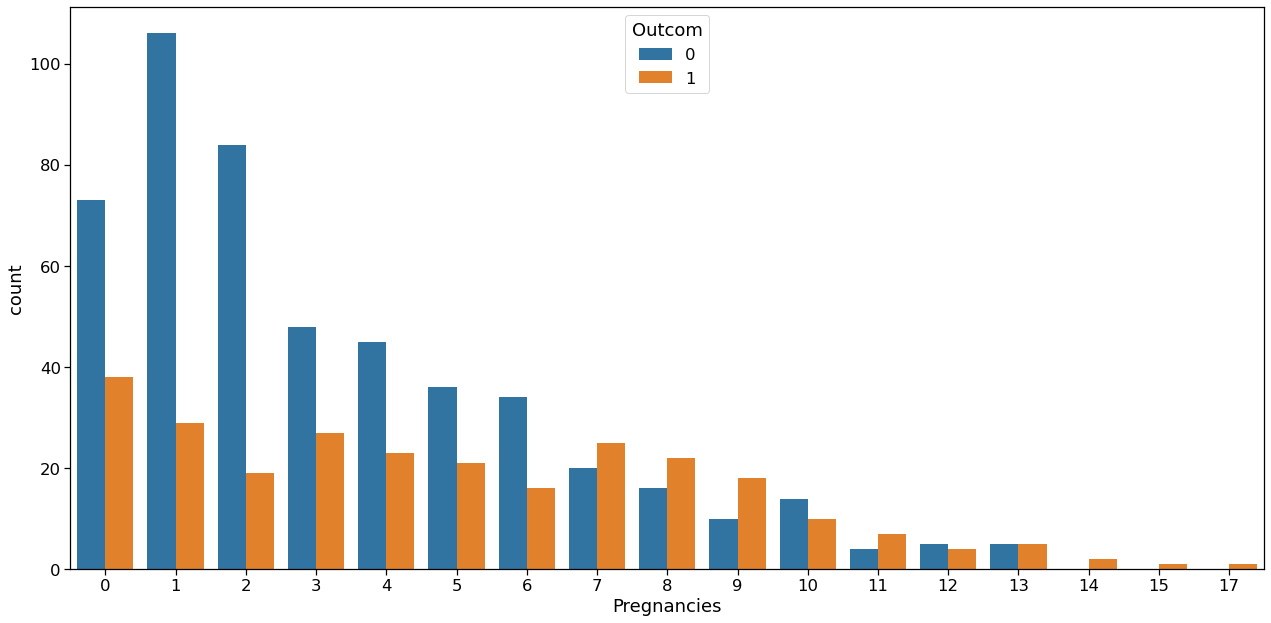

In [42]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['Pregnancies'],hue=df["Outcom"])
plt.tight_layout()

Inference: From the above graph we can make some inferences,

1. People having at least one pregnancy are likely to be diabetic.
2. People with more pregnancies are not likely to have heart diseasebe diabetic.

Elderly people are more likely to have diabetic.

# Target/Outcome

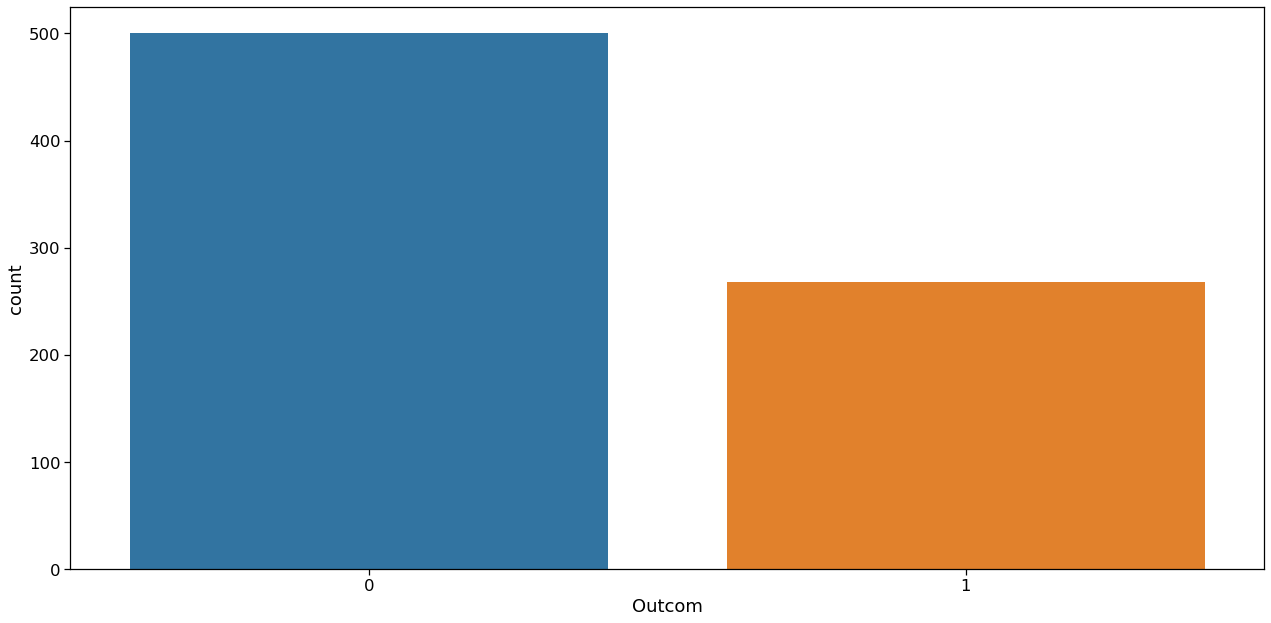

In [43]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['Outcom'])
plt.tight_layout()

In [44]:
len(df[(df.Outcom==1)])/len(df)

0.3489583333333333

Inference: The ratio between 1 and 0 is 0.34 indicating that the target feature is imbalanced.

So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

# Feature Engineering
Now we will see the complete description of the continuous data as well as the categorical data

In [45]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
--------------------
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
--------------------
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
--------------------
SkinThicknes : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18

In [46]:
X = df.drop('Outcom', axis=1)
y = df.Outcom

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
def num_pipeline_transformer(X):
  
    numerics = ['float64', 'int64']

    num_attrs = X.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(X):

    num_attrs, num_pipeline = num_pipeline_transformer(X)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ])
    prepared_data = full_pipeline.fit_transform(X)
    return prepared_data

In [48]:
prepared_data = full_pipeline.fit_transform(X)
prepared_data[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [49]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(prepared_data,y)

In [50]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [51]:
knn_model_smote = KNeighborsClassifier(n_neighbors = 10)
knn_model_smote.fit(xr_train,yr_train)

yr_pred = knn_model_smote.predict(xr_test)
print(accuracy_score(yr_test,yr_pred))

0.925


In [52]:
knn_model_smote.score(xr_test,yr_test)

0.925

In [53]:
yr_pred[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
yr_test.head(10)

232    0
0      0
24     0
110    0
123    0
335    1
503    1
432    1
350    1
317    1
Name: Outcom, dtype: int64

In [55]:
#final_model = grid_search.best_estimator_


#final_predictions = final_model.predict(xr_test)
#final_mse = mean_squared_error(yr_test, final_predictions)
#final_rmse = np.sqrt(final_mse)

In [56]:
def predict_diab(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = X
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [57]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThicknes,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [58]:
##checking it on a random sample
diabetis_config = {
    #'Pregnancies': [6],
    #'Glucose': [148],
    #'BloodPressure': [72],
    'SkinThicknes': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [80]
}

predict_diab(diabetis_config, knn_model_smote)

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [59]:
predict_diab(diabetis_config, knn_model_smote)[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

# Save the Model

In [60]:
import pickle

In [61]:
##saving the model
with open("diabetis_predict_model.pkl", 'wb') as f_out:
    pickle.dump(knn_model_smote, f_out)
    f_out.close()

In [63]:
##loading the model from the saved file
with open('diabetis_predict_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

predict_diab(diabetis_config, model)

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,